# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Tiffany 

#### Repo: https://github.com/Thilde02/article-summarizer-mod7

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [23]:
# Install spaCy if you haven't already
!pip install spacy
# Download the English small model
!python -m spacy download en_core_web_sm
import nltk
nltk.download('punkt_tab')
import numpy as np




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     ----------------- ---------------------- 5.5/12.8 MB 20.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 32.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tiffa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import requests

# 1. Download the HTML
url = "https://medium.com/@annalloydc/the-tempests-final-act-shakespeare-s-reflection-on-life-and-legacy-in-honor-of-his-birthday-d89f8f3ea800"
response = requests.get(url)
html = response.text

# 2. Save to file
with open("tempest_act_article.html", "w", encoding="utf‑8") as f:
    f.write(html)

# 3. (Optional) parse and display part of it
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
title = soup.title.string
print("Title:", title)


Title: The Tempest’s Final Act: Shakespeare’s Reflection on Life and Legacy in Honor of his Birthday | by Anna Lloyd | Medium


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [17]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# 1. Load HTML from saved file
with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# 2. Extract the plain text
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# 3. Analyze the text
blob = TextBlob(text)

# 4. Print sentiment polarity
print("Polarity Score:", blob.sentiment.polarity)

# 5. Count and print number of sentences
print("Number of Sentences in Article:", len(blob.sentences))




Polarity Score: 0.18593427645151778
Number of Sentences in Article: 19


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [13]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# 1. Load the English language model
nlp = spacy.load("en_core_web_sm")

# 2. Read the HTML file and extract text
with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# 3. Process the text with spaCy
doc = nlp(text)

# 4. Collect lowercase tokens, filtering out stopwords and punctuation
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

# 5. Count token frequencies
token_freq = Counter(tokens)

# 6. Get the 5 most common tokens
most_common = token_freq.most_common(5)

# 7. Print the results
print("Top 5 Most Frequent Tokens (lowercase):")
for token, freq in most_common:
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 Most Frequent Tokens (lowercase):
Token: 'shakespeare', Frequency: 13
Token: 'prospero', Frequency: 8
Token: 'life', Frequency: 6
Token: 'epilogue', Frequency: 5
Token: 'tempest', Frequency: 4


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [14]:

nlp = spacy.load("en_core_web_sm")

# Read and parse HTML file
with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Process text with spaCy NLP pipeline
doc = nlp(text)

# Extract lemmas, filter out stopwords, punctuation, and non-alpha tokens, and convert to lowercase
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Lemmas (lowercase):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas (lowercase):
Lemma: 'shakespeare', Frequency: 13
Lemma: 'prospero', Frequency: 8
Lemma: 'life', Frequency: 6
Lemma: 'play', Frequency: 6
Lemma: 'epilogue', Frequency: 5


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [19]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tiffa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

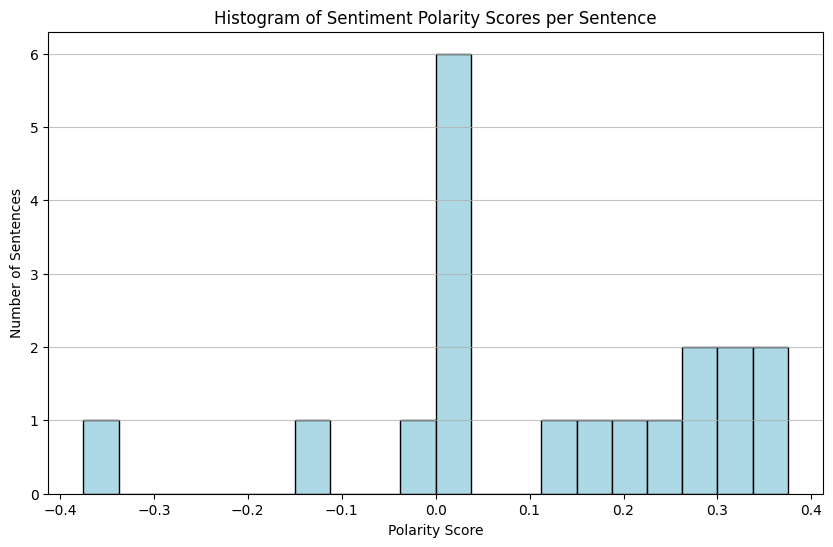

In [20]:

from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

blob = TextBlob(text)
sentence_scores = [sentence.sentiment.polarity for sentence in blob.sentences]

plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='lightblue', edgecolor='black')
plt.title("Histogram of Sentiment Polarity Scores per Sentence")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', alpha=0.75)
plt.show()

# From the histogram, most sentence polarity scores cluster near 0 (neutral).



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

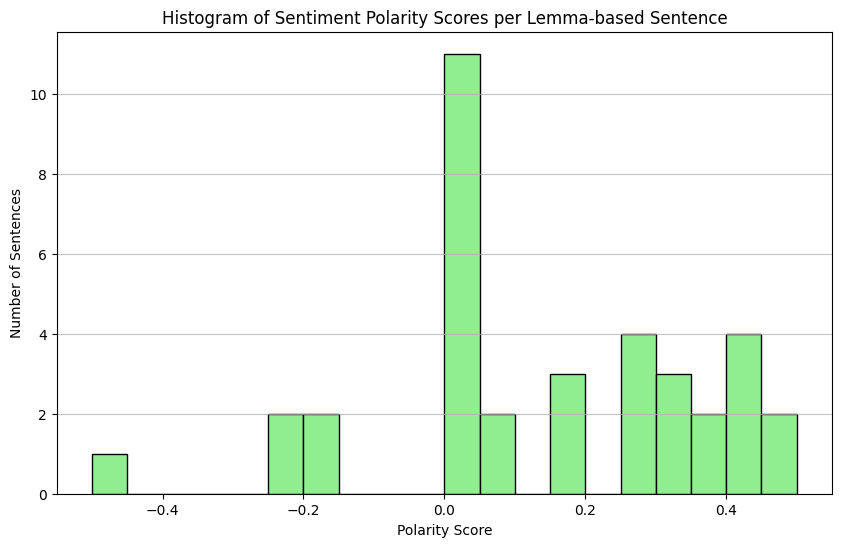

In [21]:

nlp = spacy.load("en_core_web_sm")

# Load and parse HTML file
with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Process full text with spaCy to split into sentences
doc = nlp(text)

lemma_sentences = []

# Extract lemmas per sentence and reconstruct lemma-based sentence strings
for sent in doc.sents:
    lemmas = [token.lemma_ for token in sent if token.is_alpha]  # keep alphabetic tokens only
    lemma_sentence = " ".join(lemmas)
    lemma_sentences.append(lemma_sentence)

# Calculate sentiment polarity for each lemma-based sentence using TextBlob
scores = [TextBlob(sentence).sentiment.polarity for sentence in lemma_sentences]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(scores, bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram of Sentiment Polarity Scores per Lemma-based Sentence")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Most common range comment:
# From the histogram, most lemma-based sentence polarity scores cluster near 0 (neutral),
# indicating that sentences tend to be moderately neutral in sentiment after lemmatization.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [24]:
# Suppose these are your two lists of sentence sentiment scores from Q5 and Q6
# Replace these with your actual lists
token_sentence_scores = sentence_scores  # from Q5 code, tokens-based
lemma_sentence_scores = scores           # from Q6 code, lemmas-based

# Calculate median cutoff for tokens
token_cutoff = np.median(token_sentence_scores)

# Calculate median cutoff for lemmas
lemma_cutoff = np.median(lemma_sentence_scores)

print(f"Cutoff score for tokens (median polarity): {token_cutoff:.4f}")
print(f"Cutoff score for lemmas (median polarity): {lemma_cutoff:.4f}")


Cutoff score for tokens (median polarity): 0.1167
Cutoff score for lemmas (median polarity): 0.1372


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [26]:
# Load and extract article text
with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Create TextBlob object for token-based sentences
blob = TextBlob(text)

# Your cutoff score from previous question (replace with your actual value)
cutoff_score = 0.05  # example, replace with your calculated median

# Initialize empty list to hold summary sentences
summary_sentences = []

for sent in blob.sentences:
    if sent.sentiment.polarity > cutoff_score:
        summary_sentences.append(str(sent).strip())

summary_text = ' '.join(summary_sentences)

print("Article Summary (based on token sentiment cutoff):\n")
print(summary_text)



Article Summary (based on token sentiment cutoff):

In honor of Shakespeare’s birthday, I would like to talk about one of my favorite Shakespeare plays The Tempest.The Tempest is often considered to be one of William Shakespeare’s most autobiographical plays. It was also one of the last plays that he produced, and many scholars believe that the final scene and epilogue spoken by Prospero, the main character, reflect Shakespeare’s own feelings and experiences.In the epilogue, Prospero explains why he is giving up his magical powers: “I’ll break my staff” is a nod to Shakespeare himself putting down his pen for good and saying farewell to the Globe and London to return to his family in Stratford. Prospero’s speech is often seen as a powerful reflection of Shakespeare’s own thoughts and feelings, as he looks back on his long and successful career and prepares to move on to the next stage of his life.The beginning of the monologue, “Now my charms are all o’erthrown, And what strength I hav

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [27]:
# Create TextBlob from summary text
summary_blob = TextBlob(summary_text)

# Print polarity score of the summary
print("Polarity Score of Summary:", summary_blob.sentiment.polarity)

# Print number of sentences in the summary
print("Number of Sentences in Summary:", len(summary_blob.sentences))


Polarity Score of Summary: 0.24758725071225066
Number of Sentences in Summary: 10


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [28]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load and parse HTML file
with open("tempest_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Process full text with spaCy to split into sentences
doc = nlp(text)

# Your lemma-based cutoff polarity score from Q8 (replace with your actual cutoff)
lemma_cutoff = 0.03  # example — replace with your median

summary_sentences = []

for sent in doc.sents:
    # Get lemma string for sentence (alphabetic tokens only)
    lemmas = " ".join([token.lemma_ for token in sent if token.is_alpha])
    
    # Calculate polarity on lemma string
    polarity = TextBlob(lemmas).sentiment.polarity
    
    # If polarity > cutoff, add the original sentence text (cleaned)
    if polarity > lemma_cutoff:
        summary_sentences.append(sent.text.strip())

# Join sentences into a summary string
summary_text = " ".join(summary_sentences)

print("Article Summary (based on lemma sentiment cutoff):\n")
print(summary_text)


Article Summary (based on lemma sentiment cutoff):

In honor of Shakespeare’s birthday, I would like to talk about one of my favorite Shakespeare plays The Tempest. The Tempest is often considered to be one of William Shakespeare’s most autobiographical plays. It was also one of the last plays that he produced, and many scholars believe that the final scene and epilogue spoken by Prospero, the main character, reflect Shakespeare’s own feelings and experiences. In the epilogue, Prospero explains why he is giving up his magical powers: “I’ll break my staff” is a nod to Shakespeare himself putting down his pen for good and saying farewell to the Globe and London to return to his family in Stratford. Like Prospero, Shakespeare was ready to be released from his duties of public life and the stage, and knew that it was time to go home. Prospero’s speech is often seen as a powerful reflection of Shakespeare’s own thoughts and feelings, as he looks back on his long and successful career and pr

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [29]:
# Create a TextBlob object from your lemma-based summary text
summary_blob = TextBlob(summary_text)

# Print polarity score with label
print("Polarity Score of Lemma-based Summary:", summary_blob.sentiment.polarity)

# Print number of sentences in the summary
print("Number of Sentences in Lemma-based Summary:", len(summary_blob.sentences))


Polarity Score of Lemma-based Summary: 0.280920584045584
Number of Sentences in Lemma-based Summary: 20


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The summaries generally have higher average polarity scores than the original full text. This is because the summaries only include sentences with polarity scores above the cutoff, effectively filtering out more neutral or negative sentences. The original article’s polarity reflects the sentiment of all sentences, including neutral or negatively scored ones, which brings the overall polarity closer to neutral or lower. The lemma based summary polarity might be slightly different from the token-based summary polarity due to how lemmatization changes the wording and potentially the sentiment expressed in each sentence. Overall, the summaries are biased towards more positive or sentiment-rich content because of the cutoff filter, whereas the original article includes the full range of sentiment.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Based on reading the original article, the token based summary tends to be better because it preserves the natural sentence structure and wording, making it easier to read and understand. The lemma based summary, while useful for analysis, can sometimes sound awkward or lose subtle meaning due to the base-form words replacing the original phrasing. This can make the lemma summary less engaging or clear. Therefore, the token based summary strikes a better balance between sentiment focus and readability.